In [1]:
import sys
from collections import defaultdict

import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import torch
from torch import nn, optim

sys.path.append('..')

from src.data import get_loader
from src.model import AutoEncoder
from src.train import do_epoch
from configs.improved import model_config

In [2]:
df_train = pd.read_pickle('../data/all_jets_train_4D_100_percent.pkl')
df_test = pd.read_pickle('../data/all_jets_test_4D_100_percent.pkl')

scaler = StandardScaler()
scaled_train = scaler.fit_transform(df_train)
scaled_test = scaler.transform(df_test)

joblib.dump(scaler, '../weights/scaler.pkl')

['../weights/scaler.pkl']

In [3]:
loader_train = get_loader(
    scaled_train, batch_size=model_config['batch_size'], is_train=True
)
loader_test = get_loader(
    scaled_test, batch_size=4000, is_train=False
)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Device is', device)
model = AutoEncoder(model_config)
model.to(device)

criterion = nn.MSELoss()
optimizer = optim.AdamW(
    model.parameters(), lr=model_config['lr'], weight_decay=model_config['weight_decay']
)
scheduler = optim.lr_scheduler.StepLR(
    optimizer, step_size=model_config['lr_step_size'], gamma=model_config['lr_gamma']
)

Device is cuda:0


In [4]:
losses = defaultdict(list)
loss_best = 999999

for epoch in range(1, model_config['n_epochs']+1):
    loss_train, preds_train, labels_train = do_epoch(
        model, device, criterion, loader_train, epoch, phase='train', optimizer=optimizer
    )
    with torch.no_grad():
        loss_valid, preds_valid, labels_valid = do_epoch(
            model, device, criterion, loader_test, epoch, phase='valid'
        )
    
    scheduler.step()
    losses['train'].append(loss_train)
    losses['valid'].append(loss_valid)
    
    if loss_valid < loss_best:
        print("******** New optimal found, saving state ********\n")
        loss_best = loss_valid
        path = f'../weights/model.pth'
        torch.save(model.state_dict(), path)
    
    print('-'*50)

Starting epoch: 1 | phase: train | ⏰: 16:34:14


train Loss: 0.2042
Starting epoch: 1 | phase: valid | ⏰: 16:34:15


valid Loss: 0.0341
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 2 | phase: train | ⏰: 16:34:15


train Loss: 0.0302
Starting epoch: 2 | phase: valid | ⏰: 16:34:16


valid Loss: 0.0306
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 3 | phase: train | ⏰: 16:34:16


train Loss: 0.0286
Starting epoch: 3 | phase: valid | ⏰: 16:34:17


valid Loss: 0.0286
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 4 | phase: train | ⏰: 16:34:18


train Loss: 0.0266
Starting epoch: 4 | phase: valid | ⏰: 16:34:19


valid Loss: 0.0273
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 5 | phase: train | ⏰: 16:34:19


train Loss: 0.0255
Starting epoch: 5 | phase: valid | ⏰: 16:34:20


valid Loss: 0.0234
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 6 | phase: train | ⏰: 16:34:20


train Loss: 0.0236
Starting epoch: 6 | phase: valid | ⏰: 16:34:21


valid Loss: 0.0214
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 7 | phase: train | ⏰: 16:34:21


train Loss: 0.0221
Starting epoch: 7 | phase: valid | ⏰: 16:34:22


valid Loss: 0.0256
--------------------------------------------------
Starting epoch: 8 | phase: train | ⏰: 16:34:23


train Loss: 0.0212
Starting epoch: 8 | phase: valid | ⏰: 16:34:24


valid Loss: 0.0210
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 9 | phase: train | ⏰: 16:34:24


train Loss: 0.0200
Starting epoch: 9 | phase: valid | ⏰: 16:34:25


valid Loss: 0.0196
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 10 | phase: train | ⏰: 16:34:25


train Loss: 0.0208
Starting epoch: 10 | phase: valid | ⏰: 16:34:26


valid Loss: 0.0186
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 11 | phase: train | ⏰: 16:34:26


train Loss: 0.0174
Starting epoch: 11 | phase: valid | ⏰: 16:34:27


valid Loss: 0.0173
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 12 | phase: train | ⏰: 16:34:28


train Loss: 0.0173
Starting epoch: 12 | phase: valid | ⏰: 16:34:29


valid Loss: 0.0172
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 13 | phase: train | ⏰: 16:34:29


train Loss: 0.0169
Starting epoch: 13 | phase: valid | ⏰: 16:34:30


valid Loss: 0.0165
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 14 | phase: train | ⏰: 16:34:30


train Loss: 0.0167
Starting epoch: 14 | phase: valid | ⏰: 16:34:31


valid Loss: 0.0183
--------------------------------------------------
Starting epoch: 15 | phase: train | ⏰: 16:34:31


train Loss: 0.0166
Starting epoch: 15 | phase: valid | ⏰: 16:34:33


valid Loss: 0.0168
--------------------------------------------------
Starting epoch: 16 | phase: train | ⏰: 16:34:33


train Loss: 0.0163
Starting epoch: 16 | phase: valid | ⏰: 16:34:34


valid Loss: 0.0165
--------------------------------------------------
Starting epoch: 17 | phase: train | ⏰: 16:34:34


train Loss: 0.0165
Starting epoch: 17 | phase: valid | ⏰: 16:34:35


valid Loss: 0.0155
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 18 | phase: train | ⏰: 16:34:35


train Loss: 0.0164
Starting epoch: 18 | phase: valid | ⏰: 16:34:36


valid Loss: 0.0161
--------------------------------------------------
Starting epoch: 19 | phase: train | ⏰: 16:34:37


train Loss: 0.0159
Starting epoch: 19 | phase: valid | ⏰: 16:34:38


valid Loss: 0.0164
--------------------------------------------------
Starting epoch: 20 | phase: train | ⏰: 16:34:38


train Loss: 0.0156
Starting epoch: 20 | phase: valid | ⏰: 16:34:39


valid Loss: 0.0159
--------------------------------------------------
Starting epoch: 21 | phase: train | ⏰: 16:34:39


train Loss: 0.0147
Starting epoch: 21 | phase: valid | ⏰: 16:34:40


valid Loss: 0.0144
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 22 | phase: train | ⏰: 16:34:40


train Loss: 0.0144
Starting epoch: 22 | phase: valid | ⏰: 16:34:41


valid Loss: 0.0144
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 23 | phase: train | ⏰: 16:34:42


train Loss: 0.0144
Starting epoch: 23 | phase: valid | ⏰: 16:34:43


valid Loss: 0.0144
--------------------------------------------------
Starting epoch: 24 | phase: train | ⏰: 16:34:43


train Loss: 0.0142
Starting epoch: 24 | phase: valid | ⏰: 16:34:44


valid Loss: 0.0149
--------------------------------------------------
Starting epoch: 25 | phase: train | ⏰: 16:34:44


train Loss: 0.0140
Starting epoch: 25 | phase: valid | ⏰: 16:34:45


valid Loss: 0.0140
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 26 | phase: train | ⏰: 16:34:45


train Loss: 0.0141
Starting epoch: 26 | phase: valid | ⏰: 16:34:47


valid Loss: 0.0137
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 27 | phase: train | ⏰: 16:34:47


train Loss: 0.0140
Starting epoch: 27 | phase: valid | ⏰: 16:34:48


valid Loss: 0.0152
--------------------------------------------------
Starting epoch: 28 | phase: train | ⏰: 16:34:48


train Loss: 0.0140
Starting epoch: 28 | phase: valid | ⏰: 16:34:49


valid Loss: 0.0136
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 29 | phase: train | ⏰: 16:34:49


train Loss: 0.0134
Starting epoch: 29 | phase: valid | ⏰: 16:34:50


valid Loss: 0.0135
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 30 | phase: train | ⏰: 16:34:51


train Loss: 0.0132
Starting epoch: 30 | phase: valid | ⏰: 16:34:52


valid Loss: 0.0139
--------------------------------------------------
Starting epoch: 31 | phase: train | ⏰: 16:34:52


train Loss: 0.0130
Starting epoch: 31 | phase: valid | ⏰: 16:34:53


valid Loss: 0.0128
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 32 | phase: train | ⏰: 16:34:53


train Loss: 0.0125
Starting epoch: 32 | phase: valid | ⏰: 16:34:54


valid Loss: 0.0125
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 33 | phase: train | ⏰: 16:34:54


train Loss: 0.0127
Starting epoch: 33 | phase: valid | ⏰: 16:34:55


valid Loss: 0.0124
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 34 | phase: train | ⏰: 16:34:56


train Loss: 0.0124
Starting epoch: 34 | phase: valid | ⏰: 16:34:57


valid Loss: 0.0124
--------------------------------------------------
Starting epoch: 35 | phase: train | ⏰: 16:34:57


train Loss: 0.0123
Starting epoch: 35 | phase: valid | ⏰: 16:34:58


valid Loss: 0.0125
--------------------------------------------------
Starting epoch: 36 | phase: train | ⏰: 16:34:58


train Loss: 0.0124
Starting epoch: 36 | phase: valid | ⏰: 16:34:59


valid Loss: 0.0125
--------------------------------------------------
Starting epoch: 37 | phase: train | ⏰: 16:34:59


train Loss: 0.0121
Starting epoch: 37 | phase: valid | ⏰: 16:35:00


valid Loss: 0.0121
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 38 | phase: train | ⏰: 16:35:01


train Loss: 0.0121
Starting epoch: 38 | phase: valid | ⏰: 16:35:02


valid Loss: 0.0121
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 39 | phase: train | ⏰: 16:35:02


train Loss: 0.0121
Starting epoch: 39 | phase: valid | ⏰: 16:35:03


valid Loss: 0.0124
--------------------------------------------------
Starting epoch: 40 | phase: train | ⏰: 16:35:03


train Loss: 0.0122
Starting epoch: 40 | phase: valid | ⏰: 16:35:04


valid Loss: 0.0119
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 41 | phase: train | ⏰: 16:35:05


train Loss: 0.0121
Starting epoch: 41 | phase: valid | ⏰: 16:35:06


valid Loss: 0.0123
--------------------------------------------------
Starting epoch: 42 | phase: train | ⏰: 16:35:06


train Loss: 0.0119
Starting epoch: 42 | phase: valid | ⏰: 16:35:07


valid Loss: 0.0119
--------------------------------------------------
Starting epoch: 43 | phase: train | ⏰: 16:35:07


train Loss: 0.0117
Starting epoch: 43 | phase: valid | ⏰: 16:35:08


valid Loss: 0.0115
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 44 | phase: train | ⏰: 16:35:08


train Loss: 0.0115
Starting epoch: 44 | phase: valid | ⏰: 16:35:09


valid Loss: 0.0114
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 45 | phase: train | ⏰: 16:35:10


train Loss: 0.0114
Starting epoch: 45 | phase: valid | ⏰: 16:35:11


valid Loss: 0.0114
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 46 | phase: train | ⏰: 16:35:11


train Loss: 0.0115
Starting epoch: 46 | phase: valid | ⏰: 16:35:12


valid Loss: 0.0114
--------------------------------------------------
Starting epoch: 47 | phase: train | ⏰: 16:35:12


train Loss: 0.0113
Starting epoch: 47 | phase: valid | ⏰: 16:35:13


valid Loss: 0.0113
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 48 | phase: train | ⏰: 16:35:13


train Loss: 0.0113
Starting epoch: 48 | phase: valid | ⏰: 16:35:14


valid Loss: 0.0113
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 49 | phase: train | ⏰: 16:35:15


train Loss: 0.0114
Starting epoch: 49 | phase: valid | ⏰: 16:35:16


valid Loss: 0.0113
******** New optimal found, saving state ********

--------------------------------------------------
Starting epoch: 50 | phase: train | ⏰: 16:35:16


train Loss: 0.0112
Starting epoch: 50 | phase: valid | ⏰: 16:35:17


valid Loss: 0.0114
--------------------------------------------------


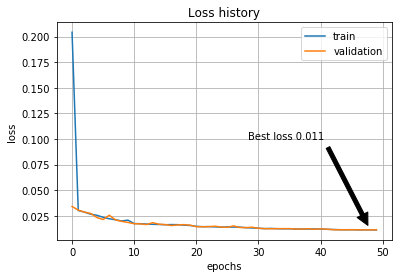

In [5]:
plt.plot(losses['train'], label='train')
plt.plot(losses['valid'], label='validation')
plt.annotate(
    f'Best loss {loss_best:.3f}',
    xy=(np.argmin(losses['valid']), loss_best),
    xycoords='data',
    xytext=(0.8, 0.5),
    textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.05),
    horizontalalignment='right',
    verticalalignment='top',
)

plt.legend()
plt.title('Loss history')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(True)